## Exploratory Data Analysis

In [12]:
#Import library untuk data preparation dan visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import pickle and json file for columns and model file
import pickle
import json
import joblib
import statistics

from scipy.stats import ttest_ind# import scipy stats untuk uji statistik
from scipy.stats import t  
import scipy.stats as scs
import yaml
import matplotlib.pyplot as plt
import src.util as util

In [13]:
config_data = util.load_config()

In [14]:
params_dir = "config/config.yaml"

In [15]:
def load_params(param_dir):
    with open(param_dir, 'r') as file:
        params = yaml.safe_load(file)
        
    return params

In [16]:
params = load_params(params_dir)

In [17]:
params

{'raw_dataset_dir': 'dataset/1 - raw data/',
 'train_set_path': ['dataset/2 - processed/X_train.pkl',
  'dataset/2 - processed/y_train.pkl'],
 'valid_set_path': ['dataset/2 - processed/X_valid.pkl',
  'dataset/2 - processed/y_valid.pkl'],
 'test_set_path': ['dataset/2 - processed/X_test.pkl',
  'dataset/2 - processed/y_test.pkl'],
 'train_bow_set_path': ['dataset/3 - final/X_train_bow.pkl',
  'dataset/3 - final/y_train_encoded.pkl'],
 'valid_bow_set_path': ['dataset/3 - final/X_valid_bow.pkl',
  'dataset/3 - final/y_valid_encoded.pkl'],
 'test_bow_set_path': ['dataset/3 - final/X_test_bow.pkl',
  'dataset/3 - final/y_test_encoded.pkl'],
 'train_tfidf_set_path': ['dataset/3 - final/X_train_tfidf.pkl',
  'dataset/3 - final/y_train_encoded.pkl'],
 'valid_tfidf_set_path': ['dataset/3 - final/X_valid_tfidf.pkl',
  'dataset/3 - final/y_valid_encoded.pkl'],
 'test_tfidf_set_path': ['dataset/3 - final/X_test_feng.pkl',
  'dataset/3 - final/X_test_tfidf.pkl'],
 'model_wordwvec': 'model/word2vec

# Import Data

Import data dengan format pickle dan akan diload menjadi dataframe sesuai dengan format save sebelumnya

In [18]:
#Import data yang sudah dibuat sebelumnya dari proses data preparation
X_train = util.pickle_load(config_data["train_set_path"][0])
y_train = util.pickle_load(config_data["train_set_path"][1])

In [19]:
# Sanity Check
X_train

,title
5544,Imax 84532 Tenor Large Recycled Glass Vase
3120,Darice 6202-113 10-Light 5-Point Star Tree Top...
1387,5 Piece Full Size Frozen Bedding Set Includes ...
1075,New Star Foodservice Knives (Set of 12)
13665,Mr &amp; Mrs T Bold &amp; Spicy Bloody Mary Mi...
...,...
19690,"Aviditi MD24126 Multi-Depth Corrugated Box, 24..."
15580,Perfume Studio&reg; Graduated Glass Dropper Bo...
10534,"Brother HL-L2340DW Compact Laser Printer, Mono..."
2793,Hello Kitty Wastebasket - Garbage Can


In [20]:
# Sanity Check
y_train

5544              Home & Kitchen
3120              Home & Kitchen
1387              Home & Kitchen
1075              Home & Kitchen
13665     Grocery & Gourmet Food
                  ...           
19690            Office Products
15580    Industrial & Scientific
10534            Office Products
2793              Home & Kitchen
7250              Home & Kitchen
Name: category, Length: 8052, dtype: object

In [21]:
#Menggabungkan x train dan y train untuk keperluan EDA
df = pd.merge(X_train, y_train, left_index=True, right_index=True)
#Sanity Check Data
df

,title,category
5544,Imax 84532 Tenor Large Recycled Glass Vase,Home & Kitchen
3120,Darice 6202-113 10-Light 5-Point Star Tree Top...,Home & Kitchen
1387,5 Piece Full Size Frozen Bedding Set Includes ...,Home & Kitchen
1075,New Star Foodservice Knives (Set of 12),Home & Kitchen
13665,Mr &amp; Mrs T Bold &amp; Spicy Bloody Mary Mi...,Grocery & Gourmet Food
...,...,...
19690,"Aviditi MD24126 Multi-Depth Corrugated Box, 24...",Office Products
15580,Perfume Studio&reg; Graduated Glass Dropper Bo...,Industrial & Scientific
10534,"Brother HL-L2340DW Compact Laser Printer, Mono...",Office Products
2793,Hello Kitty Wastebasket - Garbage Can,Home & Kitchen


## Statistika Deskriptif

In [22]:
# Statistik deskriptif
print(df.describe())

                                             title        category
count                                         8052            8052
unique                                        8052               6
top     Imax 84532 Tenor Large Recycled Glass Vase  Home & Kitchen
freq                                             1            3970


## Melihat "title" dengan nama terpanjang

In [101]:
product_with_longest_title = df.sort_values(by='title', key=lambda x: -x.str.len()).head(10)
product_with_longest_title

,title,category
4999,High Quality Rustproof Stainless Steel Shower ...,Home & Kitchen
17612,UniFire&reg; 4-inch Vanes 3 Speeds Super Power...,Home & Kitchen
12688,(25) Current Age Comic Book Bags Mylar 4 Mil B...,Office Products
4559,AWEN Curve Slow Rebound Memory Foam 3d Ventila...,Home & Kitchen
2417,Female Lion Wild Animal Nature Mouse Pads Cust...,Office Products
4613,Special Sale #1 Travel Kit Organizer - Mayflow...,Home & Kitchen
20025,2-Pack Replacement HEPA post motor filter for ...,Home & Kitchen
827,Hodely(TM) US Black Laptop Keyboard for HP Pav...,Electronics
15099,8GB Accessory Kit For Panasonic Lumix DMC-FZ60...,Electronics
13357,White Extra Large Big Button Print Numbered Ke...,Office Products


## Melihat "title" dengan nama terpendek

In [102]:
product_with_shortest_titles = df.sort_values(by='title', key=lambda x: x.str.len()).head(10)
#Sanity Check Data
product_with_shortest_titles

,title,category
16303,f,Office Products
14735,Satco,Tools & Home Improvement
8850,BERGAMO,Home & Kitchen
1395,Soap Box,Home & Kitchen
11678,YX360TreB,Tools & Home Improvement
19966,B00AO9UVB0,Tools & Home Improvement
1121,Daphne Blue,Tools & Home Improvement
17250,Stud Finder,Tools & Home Improvement
14121,C-Pen Reader,Office Products
4268,Roller Shade,Home & Kitchen


## Melihat produk dengan judul yang mengandung karakteristik tertentu 

In [103]:
# Produk dengan judul yang mengandung karakteristik tertentu (contoh: "Vintage" dalam judul)
products_with_specific_characteristic = df[df['title'].str.contains("Vintage")]
print("\nProduk dengan Karakteristik Khusus:")
#Sanity Check Data
products_with_specific_characteristic.head()


Produk dengan Karakteristik Khusus:


,title,category
11386,Aloha Hawaii - Hawaii 2015 Deluxe Wall Calenda...,Office Products
17665,Vintage Pineapple Illustration Pineapples Thro...,Home & Kitchen
14005,MYBECCA's Vintage Theme MARIJUANA FLORAL BORDE...,Home & Kitchen
15034,Corvette Flags Automotive Vintage Metal Thermo...,Home & Kitchen
4989,Vintage Handmade Copper Turkish Coffee&amp;esp...,Home & Kitchen


# Mencari baris yang mengandung tanda baca atau karakter khusus

Tanda baca atau karakter khusus dalam judul produk dapat mengganggu proses pemodelan dan analisis data. Oleh karena itu, mengidentifikasi baris yang mengandung karakter khusus memungkinkan untuk membersihkan data secara efektif sebelum melakukan analisis lebih lanjut. dan melakukan analisis teks, seperti pemodelan NLP (Natural Language Processing) atau ekstraksi fitur teks, karakter khusus dalam teks dapat memiliki dampak signifikan pada hasil analisis. Mereka bisa menjadi bagian dari kata-kata kunci atau fitur yang ingin diekstraksi.

In [104]:
# Mencari baris yang mengandung tanda baca atau karakter khusus
special_character_rows = df[df['title'].str.contains(r'[^\w\s]')]
#Sanity Check Data
special_character_rows

,title,category
3120,Darice 6202-113 10-Light 5-Point Star Tree Top...,Home & Kitchen
1387,5 Piece Full Size Frozen Bedding Set Includes ...,Home & Kitchen
1075,New Star Foodservice Knives (Set of 12),Home & Kitchen
13665,Mr &amp; Mrs T Bold &amp; Spicy Bloody Mary Mi...,Grocery & Gourmet Food
6620,"Amgate Microwave Steamer - Microwavable Fish, ...",Home & Kitchen
...,...,...
19690,"Aviditi MD24126 Multi-Depth Corrugated Box, 24...",Office Products
15580,Perfume Studio&reg; Graduated Glass Dropper Bo...,Industrial & Scientific
10534,"Brother HL-L2340DW Compact Laser Printer, Mono...",Office Products
2793,Hello Kitty Wastebasket - Garbage Can,Home & Kitchen


# Cari baris dengan multiple spaces pada kolom title

spasi ganda bisa muncul secara tidak sengaja akibat kesalahan input atau pengolahan data yang tidak konsisten. Ini bisa merusak konsistensi data yang dapat mempengaruhi hasil analisis. spasi ganda dapat mempengaruhi pencarian atau tokenisasi kata. Hal ini dapat menyebabkan kesalahan dalam pencocokan kata kunci atau pemodelan teks. Spasi ganda bisa dianggap sebagai noise karena mereka tidak menyampaikan informasi semantik yang berarti. Mengidentifikasi dan menghapus spasi ganda dapat membantu membersihkan teks. 

In [105]:
import re
# Cari baris dengan multiple spaces pada kolom title
rows_with_multiple_spaces = df[df['title'].str.contains(r'\s\s+', regex=True)]
rows_with_multiple_spaces

,title,category
5967,Shark 14316 Economy Hand Held Welding Shield,Industrial & Scientific
434,"Dietz &amp; Watson, Sliced Angus Roast Beef, ...",Grocery & Gourmet Food
9643,Black &amp; Decker DCM500 SmartBrew 5-Cup Cof...,Home & Kitchen
5819,50 LEDS Holiday Decorations Solar String Light...,Tools & Home Improvement
4350,Disney One Magical Night Storybook Tangled Ha...,Home & Kitchen
4096,Delallo Hot Pepperoncini (6x25.5Oz ),Grocery & Gourmet Food
9024,Canon MG7720 Wireless All-In-One Printer with ...,Office Products
13935,Prime-Line Products FA 2640 9/16 Block and Ta...,Tools & Home Improvement
19369,"Sterilite 18689004 Storage File Box, 4-Pack",Office Products
2963,Voltaire's Authentic Copper 16 Oz. Moscow Mul...,Home & Kitchen


## mencari baris dengan huruf besar pada kolom title

Dalam pemrosesan teks, seringkali kita ingin melakukan normalisasi teks untuk menjaga konsistensi dan mempermudah pemahaman oleh model. Salah satu bentuk normalisasi adalah mengonversi semua huruf menjadi huruf kecil atau huruf besar (biasanya huruf kecil). Ini membantu model dalam memahami teks tanpa memperdulikan perbedaan huruf besar dan huruf kecil. Beberapa model pemodelan teks mungkin lebih baik dalam memahami teks yang dikonversi menjadi huruf kecil. Mengecek keberadaan huruf besar dapat membantu mengidentifikasi data yang tidak konsisten atau tidak sesuai dengan aturan tertentu.

In [106]:
# Cari baris dengan huruf besar pada kolom title
rows_with_uppercase = df[df['title'].str.contains(r'[A-Z]')]

# Tampilkan hasil
rows_with_uppercase

,title,category
5544,Imax 84532 Tenor Large Recycled Glass Vase,Home & Kitchen
3120,Darice 6202-113 10-Light 5-Point Star Tree Top...,Home & Kitchen
1387,5 Piece Full Size Frozen Bedding Set Includes ...,Home & Kitchen
1075,New Star Foodservice Knives (Set of 12),Home & Kitchen
13665,Mr &amp; Mrs T Bold &amp; Spicy Bloody Mary Mi...,Grocery & Gourmet Food
...,...,...
19690,"Aviditi MD24126 Multi-Depth Corrugated Box, 24...",Office Products
15580,Perfume Studio&reg; Graduated Glass Dropper Bo...,Industrial & Scientific
10534,"Brother HL-L2340DW Compact Laser Printer, Mono...",Office Products
2793,Hello Kitty Wastebasket - Garbage Can,Home & Kitchen


## Cek Proporsi Data baik secara jumlah dan persentase label target

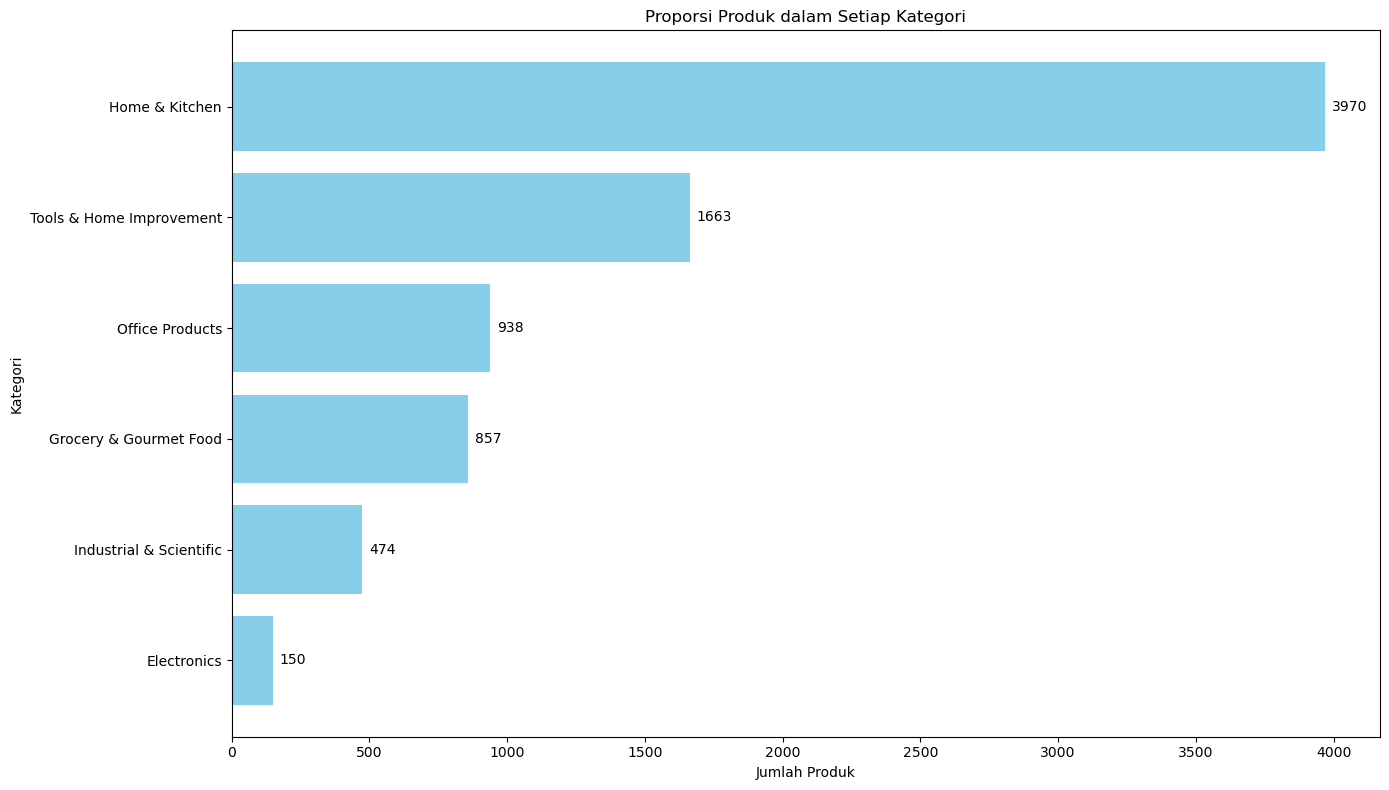

In [107]:
# Menghitung jumlah produk dalam setiap kategori
category_counts = df['category'].value_counts()

# Menyiapkan data untuk visualisasi
categories = category_counts.index
product_counts = category_counts.values

# Melakukan visualisasi data dengan menggunakan horizontal bar chart
plt.figure(figsize=(14, 8))
bars = plt.barh(categories, product_counts, color='skyblue')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori')
plt.title('Proporsi Produk dalam Setiap Kategori')

plt.gca().invert_yaxis()  # Agar kategori paling atas muncul terlebih dahulu

# Menampilkan label jumlah produk pada setiap bar
for bar in bars:
    width = bar.get_width()
    plt.gca().annotate(f'{int(width)}', 
                 xy=(width, bar.get_y() + bar.get_height()/2), 
                 xytext=(5, 0), 
                 textcoords='offset points', 
                 fontsize=10, 
                 va='center')

plt.tight_layout()

# Menampilkan plot
plt.show()

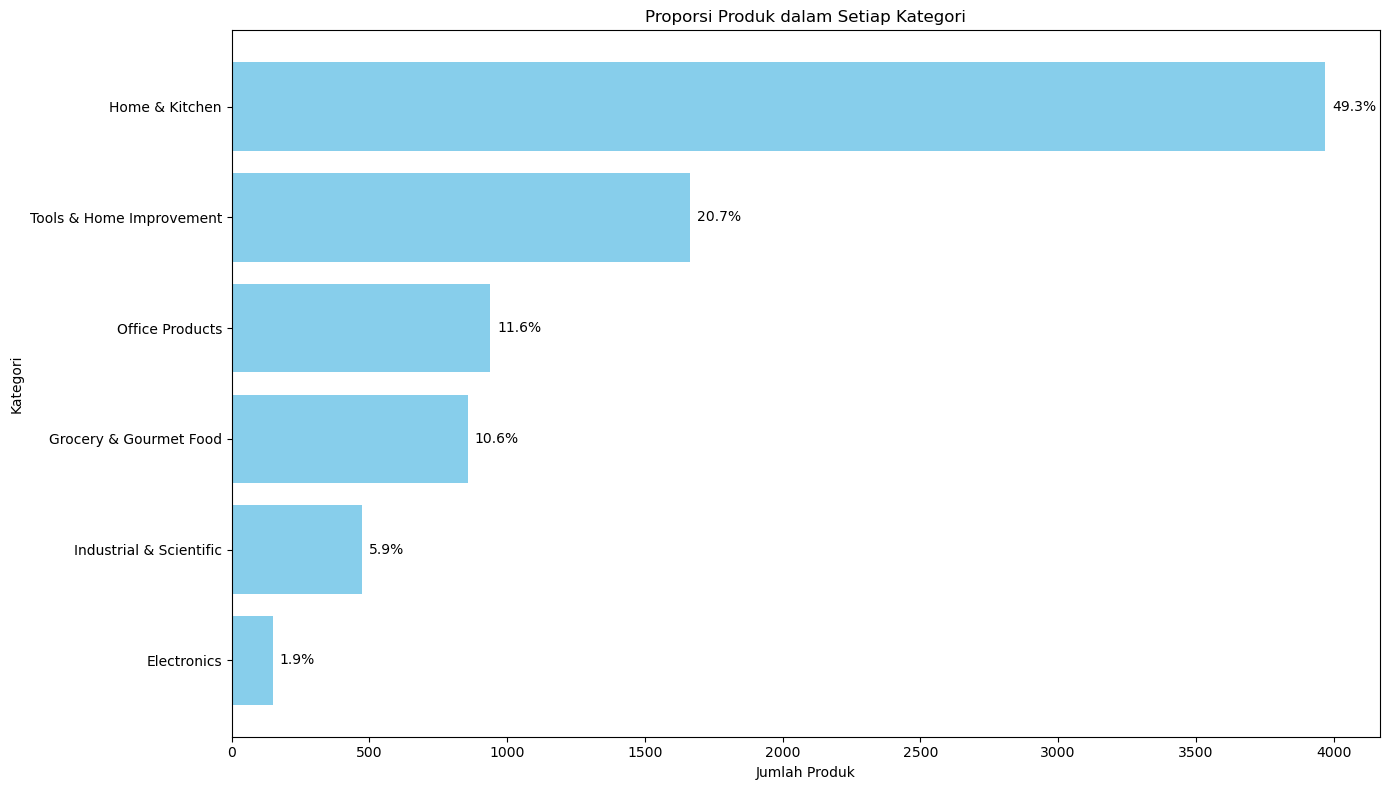

In [108]:
# Menghitung jumlah produk dalam setiap kategori
category_counts = df['category'].value_counts()

# Menyiapkan data untuk visualisasi
categories = category_counts.index
product_counts = category_counts.values

# Melakukan visualisasi data dengan menggunakan horizontal bar chart
plt.figure(figsize=(14, 8))
bars = plt.barh(categories, product_counts, color='skyblue')
plt.xlabel('Jumlah Produk')
plt.ylabel('Kategori')
plt.title('Proporsi Produk dalam Setiap Kategori')

# Menambahkan persentase pada bar chart
for bar in bars:
    width = bar.get_width()
    plt.gca().annotate(f'{width/product_counts.sum()*100:.1f}%', 
                 xy=(width, bar.get_y() + bar.get_height()/2), 
                 xytext=(5, 0), 
                 textcoords='offset points', 
                 fontsize=10, 
                 va='center')

plt.gca().invert_yaxis()  # Agar kategori paling atas muncul terlebih dahulu
plt.tight_layout()

# Menampilkan plot
plt.show()

## Eksplorasi Awal Pembangunan  Model Word2Vec untuk Representasi Kata pada Data Teks

Sebelum menjalankan model pemodelan teks yang lebih kompleks, seperti jaringan saraf, membangun representasi vektor kata dengan model Word2Vec dapat menjadi langkah pemrosesan awal yang bermanfaat.

In [109]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import os

# Tokenisasi teks menjadi kata-kata
df['tokenized_title'] = df['title'].apply(lambda x: word_tokenize(str(x).lower()))

# Membangun model Word2Vec
model = Word2Vec(df['tokenized_title'], vector_size=100, window=5, min_count=1, sg=0)

# Direktori untuk menyimpan model
model_dir = config_data["model_wordwvec"]

# Simpan model
model.save((model_dir))

# Melihat vektor kata-kata
vector = model.wv['vintage']
print("Vektor kata 'vintage':", vector)

# Melihat kata yang mirip dengan kata tertentu
similar_words = model.wv.most_similar('vintage', topn=5)
print("Kata-kata mirip dengan 'vintage':", similar_words)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Vektor kata 'vintage': [ 0.01088212  0.29576972  0.15257205  0.08687039 -0.04673126 -0.48133767
  0.15131105  0.7923088  -0.29534748 -0.42035136 -0.1393653  -0.68940854
  0.06619115  0.31763542  0.14142753 -0.41256294  0.21114631 -0.5262003
  0.10863007 -1.0112493   0.41827458  0.09393594  0.38178098 -0.26110306
 -0.24403392 -0.06314514 -0.35490724 -0.26812652 -0.38021147 -0.07619731
  0.44603768  0.18271847  0.16272461 -0.52749467 -0.26287362  0.28235447
  0.14974664 -0.2776787  -0.26190773 -0.981609   -0.13051656 -0.48424184
 -0.29309928  0.23671946  0.37074286 -0.22700296 -0.4113464   0.05081682
  0.10522934  0.28398874  0.07242938 -0.29081696 -0.15068026 -0.05553381
 -0.17150113  0.01839169  0.31105876 -0.15432483 -0.24984194  0.18960048
 -0.04258536 -0.05733455 -0.15703934  0.05650609 -0.607108    0.6495438
 -0.00983099  0.2936265  -0.46603325  0.3676551  -0.2741749   0.4941923
  0.34825897 -0.20264117  0.495471    0.19921587  0.32719415  0.05103953
 -0.38611713  0.00888711 -0.115

In [110]:
# Melihat vektor kata-kata
vector = model.wv['glass']
print("Vektor kata 'glass':", vector)

# Melihat kata yang mirip dengan kata tertentu
similar_words = model.wv.most_similar('glass', topn=5)
print("Kata-kata mirip dengan 'Glass':", similar_words)

Vektor kata 'glass': [-0.14391659  0.6690463   0.2898179   0.22504056 -0.06051242 -1.0618709
  0.34187627  1.7458129  -0.67351884 -0.90250033 -0.32079667 -1.4194876
  0.079452    0.70742273  0.32830745 -0.82302433  0.51937884 -1.0752254
  0.15522557 -2.2122805   0.8570118   0.19695142  0.9341684  -0.53671634
 -0.47413874 -0.07157127 -0.8533746  -0.4634584  -0.84413505 -0.11864515
  1.1144782   0.27857053  0.3282612  -1.1176932  -0.56009805  0.6693696
  0.37314254 -0.49327645 -0.4916062  -1.998435   -0.29795626 -1.0130388
 -0.64001304  0.51478183  0.7867443  -0.4860346  -0.8789728   0.11801751
  0.2135347   0.5787354   0.28247645 -0.6118805  -0.45486543 -0.13280724
 -0.41765353  0.03001518  0.6953994  -0.33038518 -0.5037849   0.37150365
 -0.07240794 -0.1032931  -0.18442237  0.12340718 -1.2774832   1.3831724
  0.02820653  0.6313684  -1.0432556   0.8406685  -0.5725839   0.99279785
  0.75652546 -0.39942914  1.0360328   0.40058836  0.6238252   0.20670639
 -0.8267696  -0.00716774 -0.28281552

## Eksplorasi Awal Pengelompokan Data Teks dengan K-Means Menggunakan Ekstraksi Fitur TF-IDF dan Visualisasi dengan PCA

Dengan menggabungkan ekstraksi fitur, pengelompokan, dan visualisasi, kita dapat mendapatkan wawasan yang lebih baik tentang struktur dalam data teks, yang dapat digunakan untuk berbagai tujuan analisis dan pemodelan.

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


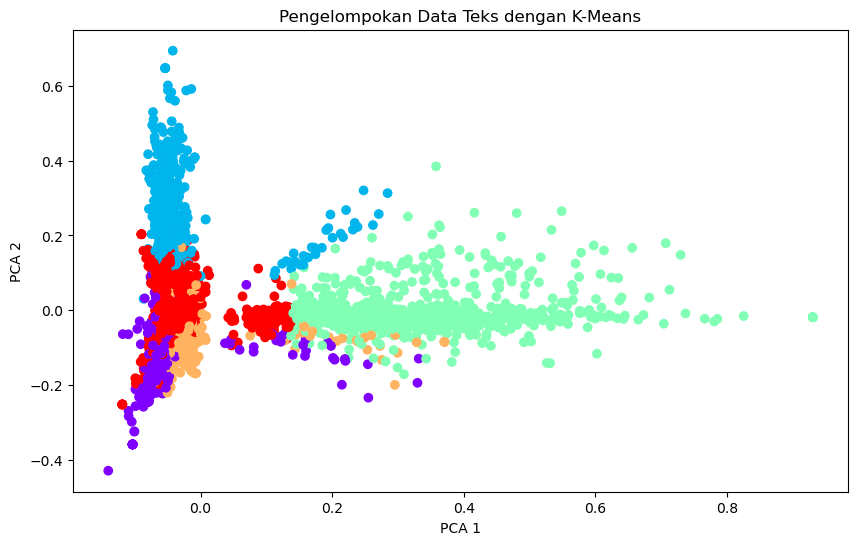

Cluster 1:
- 5 Piece Full Size Frozen Bedding Set Includes 4pc Full Sheet Set And T/Full Comforter
- New Star Foodservice Knives (Set of 12)
- Pfaltzgraff Everyday Trevi 16-Piece Dinnerware Set Service for 4
- VCNY Wakefield&nbsp; Comforter Set, 8-Piece, Queen, Red
- Set of 2 Instant Up Curtain Rod Holders Brackets
- David's Classic Collection - Set of Two - 6lbs!
- Pac-Mac Six Shot Glass Collectible Set
- Porcelain Mug, Coaster and Spoon Set, Lavender and Roses- Matching Gift Box
- CANDY CANE Christmas Tree Ornament Covers Set 12 Holiday Decor SNOWMAN Brand New
- Dress My Cupcake Personalized Message Cupcake Wrappers, Striped, Happy Birthday, Navy Blue, Set of 50
- OWILER 6 Piece Silicone Kitchen Cooking Utensils Set with Revolving Holder Carousel, Midnight Blue
- Heath Zenith SL-6018-IV5 Wireless Command, Child&#39;s Light Remote Set,Heath Zenith Wireless Command,SL-6018-IV5" />
- Pillow Perfect Outdoor Luminary Rectangular Throw Pillow, Turquoise, Set of 2
- Set 10 (5 Pair) Geisha B

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
# Ekstraksi fitur teks menggunakan TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['title'])

# Menggunakan metode K-Means untuk pengelompokan teks
kmeans = KMeans(n_clusters=5, random_state=123)  # Ganti dengan jumlah cluster yang sesuai
kmeans.fit(tfidf_matrix)
df['cluster'] = kmeans.labels_

# Visualisasi hasil pengelompokan
# Karena TF-IDF menghasilkan banyak fitur, kita akan menggunakan teknik reduksi dimensi seperti PCA untuk visualisasi
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())
df['pca1'] = reduced_features[:, 0]
df['pca2'] = reduced_features[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(df['pca1'], df['pca2'], c=df['cluster'], cmap='rainbow')
plt.title('Pengelompokan Data Teks dengan K-Means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# Menampilkan daftar judul dalam setiap kelompok
for i in range(5):  # Ganti dengan jumlah cluster yang sesuai
    cluster_samples = df[df['cluster'] == i]['title'].values
    print(f'Cluster {i + 1}:')
    for title in cluster_samples:
        print(f'- {title}')

## Membuat Word Cloud dari Product Title

Word Cloud adalah representasi visual dari kata-kata yang paling umum muncul dalam teks, di mana ukuran kata menunjukkan seberapa sering kata itu muncul dalam teks tersebut. Word Cloud memberikan visualisasi kata-kata yang paling umum muncul dalam judul produk. Ini membantu dalam mengidentifikasi kata-kata kunci yang sering digunakan dalam produk, yang dapat memberikan wawasan tentang fokus atau tren dalam daftar produk.

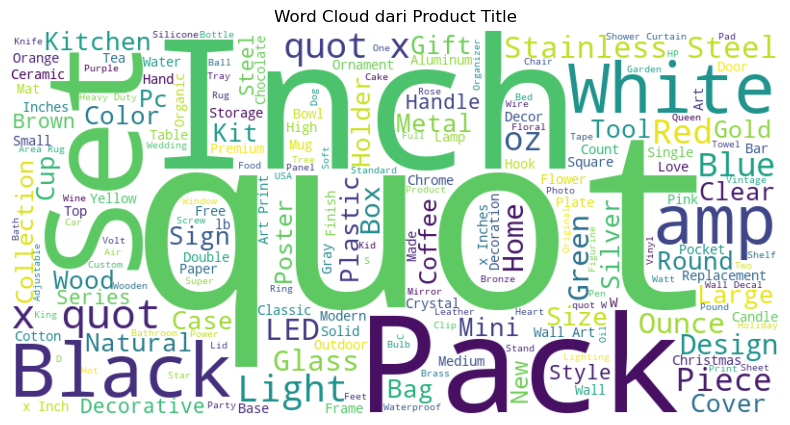

In [112]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Menggabungkan semua judul produk menjadi satu teks panjang
text = ' '.join(df['title'])

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud dari Product Title")
plt.show()

## Kesimpulan EDA

1. data tidak memiliki duplicated ditandai dengan kolom title memiliki value rows dan unique yang sama dan category memiliki 6 kelas
2. title terpanjang ditemukan pada produk dengan nama: "High-Quality Rustproof Stainless Steel Shower Curtain Hooks & Rings, Polished Chrome Modern & Luxury Decorative Design Round Rollers Made of Heavy-Duty High-Grade Corrosion-Free Brushed & Polished Silver Nickel, Won't Fall Off the Rod - Rustproof - Free Bathroom and Shower Remodeling Ideas, Set of 12". Produk ini termasuk dalam kategori Home & Kitchen.
3. title terpendek ditemukan pada produk dengan nama: "f". Produk ini termasuk dalam kategori Office Products.
4. data masih memiliki baris yang mengandung tanda baca atau karakter khusus, baris dengan multiple spaces pada kolom title, dan baris dengan huruf besar pada kolom title hal ini akan dilakukan pertimbangan untuk dilakukan preprocessing sebagai syarat menuju pemodelan data.
5. Category terbanyak yang telah dihitung pada data yang akan diproses yaitu Home & Kitchen dengan jumlah 3970 dan persentase 49.93% dan yang terendah pada category Electronics yakni sebesar 150 dengan persentase 1.9%
6. Cluster yang bisa dibuat pada tahap eksplorasi sekitar 5 cluster
7. WordCloud terbesar menampilkan kata antara lain Pack, quot, Inch, Set, Black, dan White